In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn import preprocessing
from sklearn.externals.six.moves import zip
from sklearn.metrics import accuracy_score
from numpy import random
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [4]:
foo = random.RandomState(0)

# Income Data

In [5]:
trainData = pd.read_csv('adult.data', names=['age',
                                        'workclass',
                                        'fnlwgt', 
                                        'ed',
                                        'ednum', 
                                        'marital',
                                        'occ',
                                        'rel',
                                        'race', 
                                        'sex', 
                                        'cap_gain', 
                                        'cap_loss', 
                                        'hpw', 
                                        'country', 
                                        'label'])

testData = pd.read_csv('adult.test', names=['age',
                                        'workclass',
                                        'fnlwgt', 
                                        'ed',
                                        'ednum', 
                                        'marital',
                                        'occ',
                                        'rel',
                                        'race', 
                                        'sex', 
                                        'cap_gain', 
                                        'cap_loss', 
                                        'hpw', 
                                        'country', 
                                        'label'], skiprows=1)

In [ ]:
yy0 = trainData['label']
xx0 = trainData[['age',
                                        'workclass',
                                        'fnlwgt', 
                                        'ed',
                                        'ednum', 
                                        'marital',
                                        'occ',
                                        'rel',
                                        'race', 
                                        'sex', 
                                        'cap_gain', 
                                        'cap_loss', 
                                        'hpw', 
                                        'country']]

yy1 = testData['label']
xx1 = testData[['age',
                                        'workclass',
                                        'fnlwgt', 
                                        'ed',
                                        'ednum', 
                                        'marital',
                                        'occ',
                                        'rel',
                                        'race', 
                                        'sex', 
                                        'cap_gain', 
                                        'cap_loss', 
                                        'hpw', 
                                        'country']]

In [ ]:
xx_train = pd.get_dummies(xx0, columns=['workclass', 'ed', 'marital', 'occ', 'rel', 'race', 'sex', 'country'])

In [ ]:
xx_test = pd.get_dummies(xx1, columns=['workclass', 'ed', 'marital', 'occ', 'rel', 'race', 'sex', 'country'])

In [ ]:
yy_train = pd.get_dummies(yy0)[' <=50K']
yy_test = pd.get_dummies(yy1)[' <=50K.']

In [ ]:
print xx_train.shape
print yy_train.shape
print xx_test.shape
print yy_test.shape

In [ ]:
xx_test['country_ Holand-Netherlands']=pd.Series(np.zeros(16281))

In [ ]:
xx_test = xx_test[xx_train.columns]

In [ ]:
for ii in range(108):
    print xx_test.columns[ii], xx_train.columns[ii]


In [ ]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         algorithm="SAMME",
                         n_estimators=1)

bdt.fit(xx_train, yy_train)

plot_colors = "br"
plot_step = 0.02
class_names = "AB"

plt.figure(figsize=(10, 5))


# Plot the two-class decision scores
twoclass_output = bdt.decision_function(xx_test)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[yy_test == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()

In [ ]:
twoclass_output.shape

In [ ]:
570982/3

# Forest Cover Type Data

In [7]:
fdata = pd.read_csv('covtype.data', header=None)

In [11]:
fdataBin = fdata[(fdata[54]==1) |(fdata[54]==2)]

In [13]:
fdataBin.groupby(fdataBin[54]).count()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
54,,,,,,,,,,,,,,,,,,,,,
1,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,...,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840
2,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,...,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301


In [22]:
fdataBinRi=fdataBin.reset_index(drop=True)

In [24]:
fdataBinRi.shape

(495141, 55)

In [29]:
XX = fdataBinRi[np.arange(54)]
yy = fdataBinRi[54]

In [56]:
xxTrain, xxTest, yyTrain, yyTest = train_test_split(XX, yy, test_size=0.33, random_state=13)

In [34]:
xxTrain.shape

(331744, 54)

In [ ]:
#xxTrain = fdata[np.arange(54)].iloc[0:570982]
#yyTrain = fdata[54].iloc[0:570982]
#xxTrain = fdata[np.arange(54)].iloc[0:int(570982/4)]
#yyTrain = fdata[54].iloc[0:int(570982/4)]
#xxTest = fdata[np.arange(54)].iloc[570982::]
#yyTest = fdata[54].iloc[570982::]

In [95]:
nBoosts = 5000
treeDepth = 3
rState=13
rStateRF=0
rStateRF_rand = random.RandomState(8)
lrate = 1.7

gbt = GradientBoostingClassifier(n_estimators=nBoosts, 
                                 max_depth=treeDepth,
                                learning_rate=0.1)

dt = DecisionTreeClassifier(max_depth=treeDepth)


bdt_real = AdaBoostClassifier(
    dt,
    n_estimators=nBoosts,
    learning_rate=lrate, 
    random_state=rState)

bdt_discrete = AdaBoostClassifier(
    dt,
    n_estimators=nBoosts,
    learning_rate=lrate,
    algorithm="SAMME",
    random_state=rState)

# nForests = int(1 + np.round(np.log2(nTrees)))
nTrees = 16

rf_multi = RandomForestClassifier(max_depth=treeDepth, n_estimators=nTrees, n_jobs=4, random_state=rStateRF)
rf_multi_r = RandomForestClassifier(max_depth=treeDepth, n_estimators=nTrees, n_jobs=4, random_state=rStateRF_rand)
rf_single = RandomForestClassifier(max_depth=treeDepth, n_estimators=nTrees, n_jobs=1, random_state=rStateRF)

#rfList = []
#for ii in np.linspace(2, 10, 9):
#    rfList.append(RandomForestClassifier(max_depth=ii, n_estimators=nTrees, n_jobs=4, random_state=rStateRF))
    
brf_real = AdaBoostClassifier(
    rf_multi,
    n_estimators=nBoosts,
    learning_rate=lrate,
    random_state=rState)

brf_discrete = AdaBoostClassifier(
    rf_multi,
    n_estimators=nBoosts,
    learning_rate=lrate,
    algorithm="SAMME",
    random_state=rState)


brf_real_s = AdaBoostClassifier(
    rf_single,
    n_estimators=nBoosts,
    learning_rate=1.5,
    random_state=rState)

brf_discrete_s = AdaBoostClassifier(
    rf_single,
    n_estimators=nBoosts,
    learning_rate=lrate,
    algorithm="SAMME",
    random_state=rState)


brf_real_r = AdaBoostClassifier(
    rf_multi_r,
    n_estimators=nBoosts,
    learning_rate=lrate,
    random_state=rState)

brf_discrete_r = AdaBoostClassifier(
    rf_multi_r,
    n_estimators=nBoosts,
    learning_rate=lrate,
    algorithm="SAMME",
    random_state=rState)


In [ ]:
nForests

In [64]:
%%timeit -r 10
bdt_real.fit(xxTrain, yyTrain)

1min 3s ± 1.59 s per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [65]:
%%timeit -r 10
brf_real.fit(xxTrain, yyTrain)

1min 14s ± 3.25 s per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [66]:
%%timeit -r 10
bdt_discrete.fit(xxTrain, yyTrain)

1min 9s ± 3.86 s per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [67]:
%%timeit -r 10
brf_discrete.fit(xxTrain, yyTrain)

1min 12s ± 2.13 s per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [41]:
#%%timeit -r 10
#brf_real_s.fit(xxTrain, yyTrain)

13min 32s ± 773 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [42]:
#%%timeit -r 10
#brf_discrete_s.fit(xxTrain, yyTrain)

13min 50s ± 1.32 s per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [43]:
#%%timeit -r 10
#brf_real_r.fit(xxTrain, yyTrain)

5min 53s ± 603 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [44]:
#%%timeit -r 10
#brf_discrete_r.fit(xxTrain, yyTrain)

6min ± 1.25 s per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [70]:
%%timeit -r 10
gbt.fit(xxTrain, yyTrain)

37.2 s ± 1.53 s per loop (mean ± std. dev. of 10 runs, 1 loop each)


In [96]:
bdt_real.fit(xxTrain, yyTrain)
bdt_discrete.fit(xxTrain, yyTrain)
brf_real.fit(xxTrain, yyTrain)
brf_discrete.fit(xxTrain, yyTrain)
gbt.fit(xxTrain, yyTrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

# Plot Both

In [57]:
print(xxTest.shape)
xxTest_orig = xxTest.copy(deep=True)
yyTest_orig = yyTest.copy(deep=True)
xxTest_origV2 = xxTest
yyTest_origV2 = yyTest

print(xxTest_orig.shape)
print(xxTest_origV2.shape)
xxTest = xxTest_orig[0:int(163397/2)]
yyTest = yyTest_orig[0:int(163397/2)]

print(xxTest.shape)
print(xxTest_orig.shape)
print(xxTest_origV2.shape)

(163397, 54)
(163397, 54)
(163397, 54)
(81698, 54)
(163397, 54)
(163397, 54)


In [61]:
xxTest = xxTest_orig
yyTest = yyTest_orig

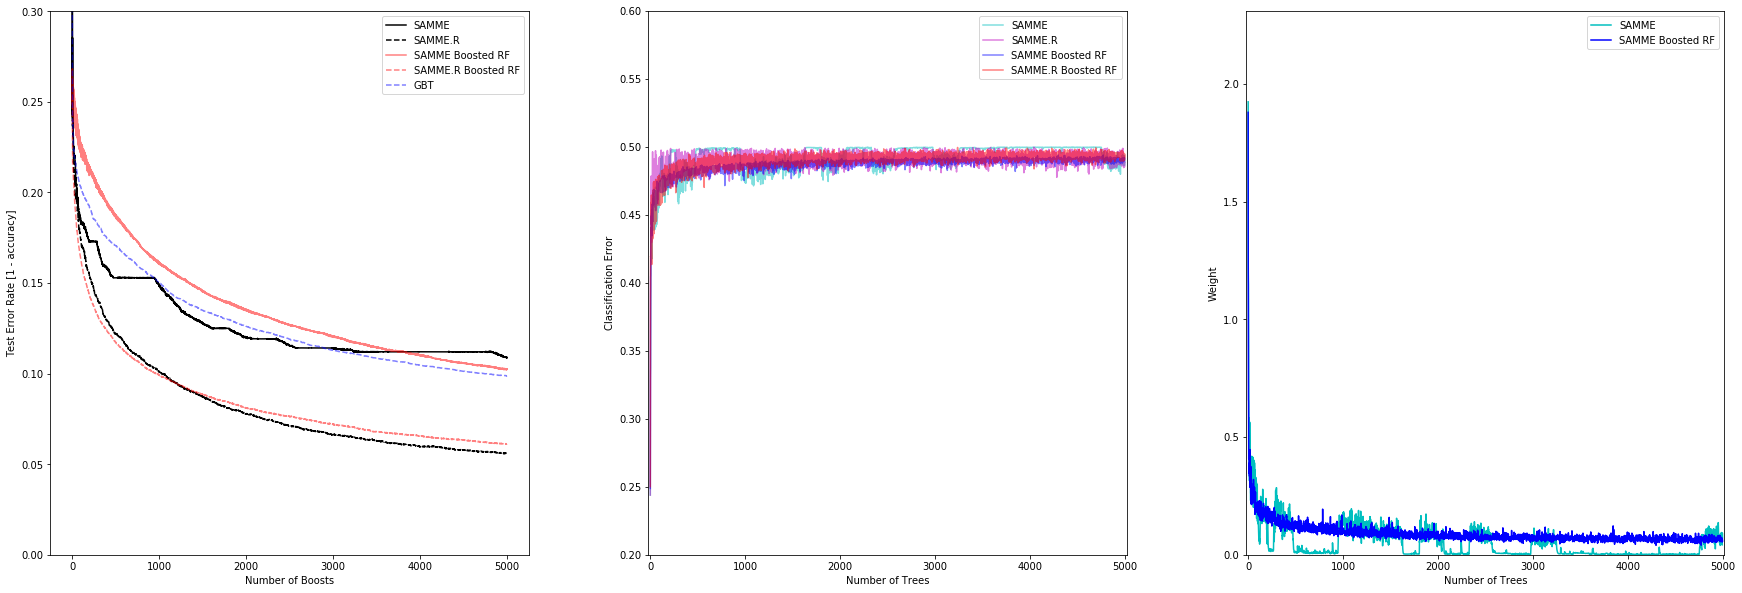

In [97]:
real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_test_predict in zip(
        bdt_real.staged_predict(xxTest), bdt_discrete.staged_predict(xxTest)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, yyTest))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_test_predict, yyTest))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)


# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]


real_test_errors_rf = []
discrete_test_errors_rf = []

for real_test_predict_rf in brf_real.staged_predict(xxTest):
    real_test_errors_rf.append(
        1. - accuracy_score(real_test_predict_rf, yyTest))   
    
for discrete_test_predict_rf in brf_discrete.staged_predict(xxTest):
    discrete_test_errors_rf.append(
        1. - accuracy_score(discrete_test_predict_rf, yyTest))

    
n_trees_discrete_rf = len(brf_discrete)
n_trees_real_rf = len(brf_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors_rf = brf_discrete.estimator_errors_[:n_trees_discrete_rf]
real_estimator_errors_rf = brf_real.estimator_errors_[:n_trees_real_rf]
discrete_estimator_weights_rf = brf_discrete.estimator_weights_[:n_trees_discrete_rf]

#########Random #############

#real_test_errors_rf_r = []
#discrete_test_errors_rf_r = []
#
#for real_test_predict_rf_r in brf_real_r.staged_predict(xxTest):
#    real_test_errors_rf_r.append(
#        1. - accuracy_score(real_test_predict_rf_r, yyTest))   
#    
#for discrete_train_predict_rf_r in brf_discrete_r.staged_predict(xxTest):
#    discrete_test_errors_rf_r.append(
#        1. - accuracy_score(discrete_train_predict_rf_r, yyTest))
#
#    
#n_trees_discrete_rf_r = len(brf_discrete_r)
#n_trees_real_rf_r = len(brf_real_r)
#
# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
#discrete_estimator_errors_rf_r = brf_discrete_r.estimator_errors_[:n_trees_discrete_rf]
#real_estimator_errors_rf_r = brf_real_r.estimator_errors_[:n_trees_real_rf]
#discrete_estimator_weights_rf_r = brf_discrete_r.estimator_weights_[:n_trees_discrete_rf]


###########GBT ####################

gbt_test_errors = []

for gbt_test_predict in gbt.staged_predict(xxTest):
    gbt_test_errors.append(
        1. - accuracy_score(gbt_test_predict, yyTest))   
    
    
n_trees_gbt = len(gbt)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
#gbt_estimator_errors = gbt.estimator_errors_[:n_trees_gbt]


plt.figure(figsize=(30, 10))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='black',
         linestyle='dashed', label='SAMME.R')
plt.plot(range(1, n_trees_discrete_rf + 1),
         discrete_test_errors_rf, c='r', label='SAMME Boosted RF', alpha=0.5 )
plt.plot(range(1, n_trees_real_rf + 1),
         real_test_errors_rf, c='r',
         linestyle='dashed', label='SAMME.R Boosted RF', alpha=0.5)
plt.plot(range(1, n_trees_gbt + 1),
         gbt_test_errors, c='b',
         linestyle='dashed', label='GBT', alpha=0.5)

#plt.plot(range(1, n_trees_discrete_rf_r + 1),
#         discrete_test_errors_rf_r, c='b', label='SAMME Boosted RF Rand')
#plt.plot(range(1, n_trees_real_rf_r + 1),
#         real_test_errors_rf_r, c='b',
#         linestyle='dashed', label='SAMME.R Boosted RF Rand')
plt.legend()
plt.ylim(0.0, 0.30)
plt.ylabel('Test Error Rate [1 - accuracy]')
plt.xlabel('Number of Boosts')

## PLOT 2 ##
plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "c", label='SAMME', alpha=.5)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "m", label='SAMME.R', alpha=.5)
plt.plot(range(1, n_trees_discrete_rf + 1), discrete_estimator_errors_rf,
         "b", label='SAMME Boosted RF', alpha=.5)
plt.plot(range(1, n_trees_real_rf + 1), real_estimator_errors_rf,
         "r", label='SAMME.R Boosted RF', alpha=.5)
plt.legend()
plt.ylabel('Classification Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))


## PLOT 3 ##
plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
         "c", label='SAMME')
plt.plot(range(1, n_trees_discrete_rf + 1), discrete_estimator_weights_rf,
         "b", label='SAMME Boosted RF')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()

In [ ]:
xxTrain = fdata[np.arange(54)].iloc[10030::]
yyTrain = fdata[54].iloc[10030::]

xxTest = fdata[np.arange(54)].iloc[0:10030]
yyTest = fdata[54].iloc[0:10030]

In [ ]:
bdt_real.fit(xxTrain, yyTrain)
bdt_discrete.fit(xxTrain, yyTrain)
brf_real.fit(xxTrain, yyTrain)
brf_discrete.fit(xxTrain, yyTrain)
gbt.fit(xxTrain, yyTrain)

In [ ]:
real_test_errors = []
discrete_test_errors = []

for real_test_predict, discrete_train_predict in zip(
        bdt_real.staged_predict(xxTest), bdt_discrete.staged_predict(xxTest)):
    real_test_errors.append(
        1. - accuracy_score(real_test_predict, yyTest))
    discrete_test_errors.append(
        1. - accuracy_score(discrete_train_predict, yyTest))

n_trees_discrete = len(bdt_discrete)
n_trees_real = len(bdt_real)


# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors = bdt_discrete.estimator_errors_[:n_trees_discrete]
real_estimator_errors = bdt_real.estimator_errors_[:n_trees_real]
discrete_estimator_weights = bdt_discrete.estimator_weights_[:n_trees_discrete]


real_test_errors_rf = []
discrete_test_errors_rf = []

for real_test_predict_rf in brf_real.staged_predict(xxTest):
    real_test_errors_rf.append(
        1. - accuracy_score(real_test_predict_rf, yyTest))   
    
for discrete_train_predict_rf in brf_discrete.staged_predict(xxTest):
    discrete_test_errors_rf.append(
        1. - accuracy_score(discrete_train_predict_rf, yyTest))

    
n_trees_discrete_rf = len(brf_discrete)
n_trees_real_rf = len(brf_real)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
discrete_estimator_errors_rf = brf_discrete.estimator_errors_[:n_trees_discrete_rf]
real_estimator_errors_rf = brf_real.estimator_errors_[:n_trees_real_rf]
discrete_estimator_weights_rf = brf_discrete.estimator_weights_[:n_trees_discrete_rf]

#########Random #############

#real_test_errors_rf_r = []
#discrete_test_errors_rf_r = []
#
#for real_test_predict_rf_r in brf_real_r.staged_predict(xxTest):
#    real_test_errors_rf_r.append(
#        1. - accuracy_score(real_test_predict_rf_r, yyTest))   
#    
#for discrete_train_predict_rf_r in brf_discrete_r.staged_predict(xxTest):
#    discrete_test_errors_rf_r.append(
#        1. - accuracy_score(discrete_train_predict_rf_r, yyTest))
#
#    
#n_trees_discrete_rf_r = len(brf_discrete_r)
#n_trees_real_rf_r = len(brf_real_r)
#
# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
#discrete_estimator_errors_rf_r = brf_discrete_r.estimator_errors_[:n_trees_discrete_rf]
#real_estimator_errors_rf_r = brf_real_r.estimator_errors_[:n_trees_real_rf]
#discrete_estimator_weights_rf_r = brf_discrete_r.estimator_weights_[:n_trees_discrete_rf]


###########GBT ####################

gbt_test_errors = []

for gbt_test_predict in gbt.staged_predict(xxTest):
    gbt_test_errors.append(
        1. - accuracy_score(gbt_test_predict, yyTest))   
    
    
n_trees_gbt = len(gbt)

# Boosting might terminate early, but the following arrays are always
# n_estimators long. We crop them to the actual number of trees here:
#gbt_estimator_errors = gbt.estimator_errors_[:n_trees_gbt]


plt.figure(figsize=(30, 10))

plt.subplot(131)
plt.plot(range(1, n_trees_discrete + 1),
         discrete_test_errors, c='black', label='SAMME')
plt.plot(range(1, n_trees_real + 1),
         real_test_errors, c='black',
         linestyle='dashed', label='SAMME.R')
plt.plot(range(1, n_trees_discrete_rf + 1),
         discrete_test_errors_rf, c='r', label='SAMME Boosted RF', alpha=0.5 )
plt.plot(range(1, n_trees_real_rf + 1),
         real_test_errors_rf, c='r',
         linestyle='dashed', label='SAMME.R Boosted RF', alpha=0.5)
plt.plot(range(1, n_trees_gbt + 1),
         gbt_test_errors, c='b',
         linestyle='dashed', label='GBT', alpha=0.5)

#plt.plot(range(1, n_trees_discrete_rf_r + 1),
#         discrete_test_errors_rf_r, c='b', label='SAMME Boosted RF Rand')
#plt.plot(range(1, n_trees_real_rf_r + 1),
#         real_test_errors_rf_r, c='b',
#         linestyle='dashed', label='SAMME.R Boosted RF Rand')
plt.legend()
plt.ylim(0.0, 1.0)
plt.ylabel('Test Error')
plt.xlabel('Number of Trees')

## PLOT 2 ##
plt.subplot(132)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_errors,
         "c", label='SAMME', alpha=.5)
plt.plot(range(1, n_trees_real + 1), real_estimator_errors,
         "m", label='SAMME.R', alpha=.5)
plt.plot(range(1, n_trees_discrete_rf + 1), discrete_estimator_errors_rf,
         "b", label='SAMME Boosted RF', alpha=.5)
plt.plot(range(1, n_trees_real_rf + 1), real_estimator_errors_rf,
         "r", label='SAMME.R Boosted RF', alpha=.5)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Number of Trees')
plt.ylim((.2,
         max(real_estimator_errors.max(),
             discrete_estimator_errors.max()) * 1.2))
plt.xlim((-20, len(bdt_discrete) + 20))


## PLOT 3 ##
plt.subplot(133)
plt.plot(range(1, n_trees_discrete + 1), discrete_estimator_weights,
         "c", label='SAMME')
plt.plot(range(1, n_trees_discrete_rf + 1), discrete_estimator_weights_rf,
         "b", label='SAMME Boosted RF')
plt.legend()
plt.ylabel('Weight')
plt.xlabel('Number of Trees')
plt.ylim((0, discrete_estimator_weights.max() * 1.2))
plt.xlim((-20, n_trees_discrete + 20))

# prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.25)
plt.show()